# CSCI 3022: Intro to Data Science - Spring 2018 Practicum 
***
- <span style="color:blue">Version 1.01 - clarified problem 1B (in blue text).</span>
- <span style="color:green">Version 1.02 - clarified problem 1D (in green text).</span>
- <span style="color:red">Version 1.03 - clarified problem 2D (in red text).</span>


This practicum is due on Moodle by **11:55pm on Wednesday May 2nd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
2. You may **NOT** post to message boards or other online resources asking for help. 
3. You may **NOT** collaborate with classmates or anyone else.  

Violation of the above rules will result in an **F** in the course and a trip to Honor Council. 

***

**By writing your name below you agree to abide by the rules given above:**

**Name**: 
Jake Liebow

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Chris and Dan, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class we will make the post public (and anonymous). 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [143]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### [35 points] Problem 1: Malaria Parasite Problems
***

Malaria parasites are very good at evading the immune system. Each parasite's genome has 60 different versions of a key immune evasion gene, so that when you get malaria, instead of simply getting sick and then getting better, the parasite switches among its 60 genes, sequentially, thereby changing its camouflage over and over and over. This is one of the reasons that malaria is still a huge problem today: you never develop a really strong immunity to the overall parasite population, due to its huge genetic diversity. You can read more about this [here](https://www.quantamagazine.org/networks-untangle-malarias-deadly-shuffle-20151015/) if you like. 

Here we are concerned with helping out lab scientists in desigining and evaluating their genetic sequencing experiments which target _var_ genes. The setup is as follows:

* Each parasite has a repertoire of 60 different "var" genes.
* A process called PCR is applied to a parasite genome. If PCR is successful, we get the sequence of one of the var genes, drawn at random from the repertoire of 60. However, PCR might not be successful at all, in which case we get nothing. Let the probability that a PCR attempt fails be equal to $f$. 
* In other words, with probability $f$, PCR yields nothing. With probability $1-f$, PCR produces a var gene sequence, and this sequence is chosen uniformly at random from among the total 60 var genes. 
* Importantly, PCR _does not deplete the DNA in the sample_, meaning that if one repeats the PCR process, the stochastic process described above takes place again, independently of the outcome of the previous PCR.
* In other words, a repeated PCR might fail, or it might succeed. And, if it succeeds, the same gene might be sequenced _or_ a different one of the 60 genes might be sequenced.
* To be clear: repeating PCR might sample a previously sampled gene, or it might sample another one of the 60. Then again, any individual PCR fails with probability $f$.

**Part A**: Suppose you have the budget to do $r$ PCR replicates (i.e. $r$ indepedent PCR trials). Let $k$ be the number of PCRs that are successful. Since $k$ is a random variable, what is the name of its distribution? What is the expected value of $k$, and how does it depend on $r$? What is the standard deviation of $k$?

In [98]:
np.random.binomial(12,.75)

8

k is a random variable that results in success or failure with a probability of 1-f and f respectivley, it therefore follows the binomial distribution. The expected value of a binomial distribution (in this case: k) is simply equal to the number of trials (in this case: r) multiplied by the probability of success (in this case: 1-f). The variance of a binomial distribution is equal to the number of trials (r) times the probability of failure f times the probability of not failure 1-f. Once we have found the variance, in order to find the standard deviation we must simply take the square root of the variance.

**Part B**: Write a function called `draw_pcr_samples(r,f,var_repertoire)` that makes $r$ repeated attemps at PCR, each with independent probability of failure $f$. This code must return a list of the successfully sequenced var genes. For your convenience, please use the list `var_repertoire` below as the 60 possible var genes that are being sampled. <span style="color:blue">When written correctly, the output of this code will change each time, depending on the success or failure of each PCR, and which var gene is chosen. To examine the output of your function, please repeatedly call it under three different conditions, and produce the following histograms: </span>
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=48$ and $f=0$. Make this histogram `blue`.
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=60$ and $f=0.2$. Make this histogram `green`.
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=120$ and $f=0.6$. Make this histogram `gold`.

In [99]:
var_repertoire = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q',
                  'r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H',
                 'I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                 'π','ø','ß','∆','ç','Ω','µ','∞']

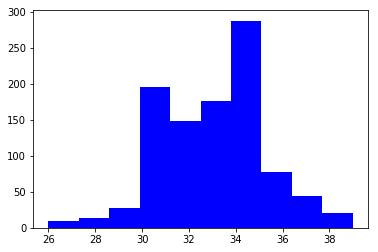

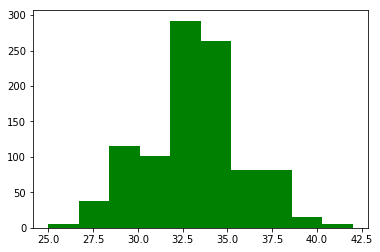

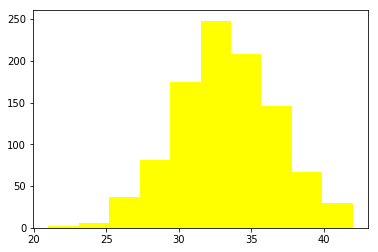

In [100]:
rf=[[48,0],[60,0.2],[120,0.6]]
r=1#ignore
f=1#ignore

def draw_pcr_samples(r,f,var_repertoire):
    sarr=[]
    for q in rf:
        arr=[]
        for i in range(q[0]):
            if (np.random.binomial(1,1-q[1])==1):
                index=np.random.randint(0,60) #documentation from numpy website: eturn random integers from the “discrete uniform” distribution
                arr.append(var_repertoire[index])
        sarr.append(arr)
    return sarr

bhist=[]
grhist=[]
glhist=[]
for k in range(1000):
    blue = []
    green = []
    gold = []
    sarr=draw_pcr_samples(r,f,var_repertoire)
    for x in sarr[0]:
        if x not in blue:
            blue.append(x)
    for x in sarr[1]:
        if x not in green:
            green.append(x)
    for x in sarr[2]:
        if x not in gold:
            gold.append(x)
    bhist.append(len(blue))
    grhist.append(len(green))
    glhist.append(len(gold))
plt.hist(bhist, color="blue")
plt.show()
plt.hist(grhist, color="green")
plt.show()
plt.hist(glhist, color="yellow")
plt.show()

**Part C**: Use your calculations in Part A to write down the expected number of successful PCRs, $k$, for each of the three scenarios that you made histograms for in Part B. What do you notice? Write it in MarkDown. Then, examine the 3 histograms generated in Part B, and explain the relationship, if any, between the histograms and your expected $k$ calculations. If making calculations or annotating the histograms is helpful in your explanation, feel free to do so. 

In [147]:
rf=[[48,0],[60,0.2],[120,0.6]]
for x in rf:
    EX=x[0]*(1-x[1])
    print(EX)

48
48.0
48.0


These distributions fit very well with our calculated expected values as both groups are very similar to each other

**Part D**: Lab scientists use what's called a _96-well plate_ to do experiments. A [96-well-plate](https://www.amazon.com/SEOH-Microplates-Well-Non-Sterile-Microchemistry/dp/B0088AR7Y6) is an 8-by-12 grid of little wells in which indepedent experiments can be conducted. Professor Amy Ferguson is wondering whether to dedicate a whole plate ($r=96$ independent PCR replicates) or a half plate ($r=48$ independent PCR replicates) to her PCR experiment. Or, she wonders whether she should use a different $r$ altogether. Use your code to simulate and compute answers to the following, assuming $f=0.1$:
* In expectation, how many _unique_ genes are produced for $r=48$?
* In expectation, how many _unique_ genes are produced for $r=96$?
* If $r$ is large, then the chance that $55$ or more <span style="color:green">_unique_</span> genes are sampled will increase. Professor Ferguson needs the probability that $55$ or more <span style="color:green">_unique_</span> genes are sampled to be greater than 95%. What should $r$ be? Support your answer by creating a plot of <span style="color:green">$P(\text{at-least-55-unique-sampled} \mid r)$</span> vs $r$.

In expectation, the number of unique genes with r=48 is equal to 48*(1-0.1)=43.2

In expectation, the number of unique genes with r=96 can be no greater than 60(the number of unique genes) and no less because without that knowledge we can calculate our expected number of unique genes to 96*(.9)=86.4. Given the 90% probability of finding a unique gene it is very likley that we will have already discovered all 60 variations at this point.

r should equal 67 for 95% probability that we will have discovered 55 or more genes


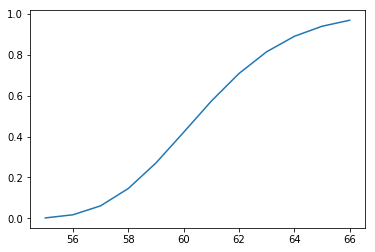

In [156]:
f = 0.1
r = 55
count=0
p = 0
cdf=[]
while(p < 0.95):
    r += 1
    p = 1-stats.binom.cdf(55,r,1-f)
    cdf.append(p)
    count+=1
print('r should equal', r,'for 95% probability that we will have discovered 55 or more genes')
xaxis=[]
for x in range(count):
    xaxis.append(x+55)
plt.plot(xaxis,cdf)
plt.show()

**Part E**: Bills, bills, bills. Professory Amy Ferguson has a decision to make about her lab budget. Here are some numbers:

* Each 96-well plate costs \$5 to buy. 
* The cheap PCR reagents cost $c=$\$0.05 per well and fail with probability $f=0.3$.
* The expensive PCR reagents cost $c=$\$0.10 per well and fail with probability $f=0.1$.
* The premium PCR reagents cost $c=$\$0.20 per well and fail with probability $f=0.05$.

Amy needs at least 50 unique sequences from a particular parasite genome for her experiment to be considered a success. She also knows that this whole PCR thing is a stochastic process, so while she might get 50 unique sequences in just $r=50$ attempts, that's going to be pretty rare. Still, increasing $r$ will increase the probability of success, i.e. of getting $\geq50$ unique sequences. 

Turns out, she needs to success with probability of at least 0.95. She could achieve this using the cheap reagents, the expensive reagents, or the premium reagents. Naturally, she'd need to buy more of the cheaper reagents, but... the tradeoff isn't clear. 

Help! Which reagents should she choose? State your answer clearly as a recommendation, and explain why you recommend that. Use figures and calculations as necessary to support your case.

You may assume:
* A 96-well plate costs \$5 even if fewer than 96 of the wells are actually used. For example, using 97 wells costs \$10, since it uses two plates.
* Reagents are billed on a per-well basis, not on a per-plate basis.
* The goal is to sample 50 or more unique sequences 95\% of the time or greater, but for as little money as possible.

In [162]:
pcr = 1
cost = 0.05
f = 0.3
r = 50
p = 0

while(p < 0.95):
    r += 1
    p = 1-stats.binom.cdf(50,r,1-f)
    if(r > 96):
        pcr += 1
print("cheap r=",r)
print("cheap cost=",r*cost+5*pcr)

cheap r= 83
cheap cost= 9.15


In [163]:
pcr = 1
f = 0.1
r = 50
p = 0
cost = 0.10

while(p < 0.95):
    r += 1
    p = 1-stats.binom.cdf(50,r,1-f)
    if(r > 96):
        pcr += 1
print("expensive r=",r)
print("expensive cost=",r*cost+5*pcr)

expensive r= 61
expensive cost= 11.100000000000001


In [164]:
pcr = 1
f = 0.05
r = 50
p = 0
cost = 0.2

while(p < 0.95):
    r += 1
    p = 1-stats.binom.cdf(50,r,1-f)
    if(r > 96):
        pcr += 1
print("premium r=",r)
print("premium cost=",r*cost+5*pcr)

premium r= 57
premium cost= 16.4


The cheap regent gives you the most bang for your buck, it is by far the cheapest option and your r value which quarentees 95% probability of success in trials is still below the limit of 96 making it unneccessary to purchase another plate and still surprisingly effective. There is no better option. 

### [35 points] Problem 2: Parental Leave
***

The file `leave.tsv` is in the data folder. It contains information on paid parental leave policies for US and Canadian institutions for tenure-track professors. 

Answer the following questions and provide both _pseudocode_ and code for each question. In other words, in a #comment, explain what your code is doing in each step, and give the reader a brief hint as to why that's a good or necessary step. (This is what we mean by pseudocode.)  Then, provide the code that answers the question. 

Note that `pandas` is your friend here. Also, note that the researchers who assembled `leave.tsv` may have coded missing data in a variety of ways, so you'll need to explore the file to learn what those are. 

**Part A**: Figure out what a `.tsv` file is and how to load it in using `pandas`. Call your dataframe `dfLeave`. **Note** that, as in many real-life data science tasks, there is no code to import this file type in any of our in-class notebooks or homeworks; This step will require a web search.

In [105]:
dfLeave=pd.read_table("data/leave.tsv")#read data into dataframe
dfLeave

,university_name,short_name,is_private,rank,rank_ind,census_region,missing,paid_leave_len_woman,paid_leave_len_woman_units,paid_leave_weeks_woman,relief_woman,paid_leave_len_man,paid_leave_len_man_units,paid_leave_weeks_man,relief_man,link,notes,date
0,Arizona State University,Arizona State,0,108.72,101,West,0,6.0,week,6.0,Not specified,6.0,week,6.0,Not specified,https://provost.asu.edu/academic-personnel/par...,.,2/22/18
1,Auburn University,Auburn,0,126.69,122,South,0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,https://cws.auburn.edu/shared/content/files/85/,FMLA,2/22/18
2,Boston University,Boston,1,51.73,44,Northeast,0,1.0,term,14.0,Other,1.0,term,14.0,Other,https://www.bu.edu/handbook/leaves-absences/fa...,"Full semester for either parent, relief is FUL...",2/22/18
3,Brandeis University,Brandeis,1,84.55,78,Northeast,0,12.0,week,12.0,Not specified,12.0,week,12.0,Not specified,https://www.brandeis.edu/humanresources/docume...,.,2/22/18
4,Brigham Young University,Brigham Young,1,166.53,180,West,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not publicly accessible,Staff leave is 6wk,2/22/18
5,Brown University,Brown,1,21.92,18,Northeast,0,1.0,term,16.0,Just teaching,1.0,term,16.0,Just teaching,https://www.brown.edu/about/administration/dea...,One semester but only relief from teaching. Ot...,2/22/18
6,California Institute of Technology,CalTech,1,5.24,3,West,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not publicly accessible: https://provost.calte...,.,2/22/18
7,Carleton University,Carleton,0,101.73,93,Canada,0,12.0,week,12.0,Not specified,12.0,week,12.0,Not specified,https://carleton.ca/hr/wp-content/uploads/CUAS...,12 weeks paid + 5 weeks with the Employer payi...,2/22/18
8,Carnegie Mellon University,Carnegie Mellon,1,9.28,6,Northeast,0,1.0,term,16.0,Not specified,1.0,term,16.0,Not specified,https://www.cmu.edu/policies/faculty/faculty-p...,Statement seems to imply relief from all dutie...,2/22/18
9,Case Western Reserve University,Case Western Reserve,1,70.82,58,Midwest,0,16.0,week,16.0,All duties,16.0,week,16.0,All duties,http://case.edu/facultysenate/media/caseedu/fa...,Up to 16 weeks,2/22/18


**Part B**: Answer the following summary questions:
* How many institutions are in the dataset? 
* How many actually have parental leave data in the `paid_leave_len_woman` column? 
* How many private institutions are there? 
* How many institutions have a note associated with them?

In [134]:
c=dfLeave["university_name"].nunique()#count number of unique institutions to find how many institutions in the data set
print("How many institutions are in the dataset?",c)

X=dfLeave.dropna(subset=["paid_leave_len_woman"])#drop all rows with no data in paid_leave_len_woman column
data=len(X)#get the difference between the length of the whole df and the length of the df with no data in paid_leave_len_woman rows removed
print("How many actually have parental leave data in the paid_leave_len_woman column?",data)

prv=dfLeave["is_private"].loc[dfLeave["is_private"]==1].count() #count how many universities have the is_private column set to 1 which should correspond to true, this will count the number of private universities
print("How many private institutions are there?",prv)

dfn=dfLeave.dropna(subset=["notes"])#drop all nans
na=len(dfLeave)-len(dfn)#get diff between natural length and no nans in dfLeave length
empt=dfLeave["notes"].loc[dfLeave["notes"]=='.'].count()#they seem to denote empty rows with a period for this column, so I counted every period to get a count of the number of empty notes
print("How many institutions have a note associated with them?",(len(dfLeave)-empt-na))#total length of the df - empty and nan rows, this only leaves note containing rows


How many institutions are in the dataset? 205
How many actually have parental leave data in the paid_leave_len_woman column? 197
How many private institutions are there? 53
How many institutions have a note associated with them? 172


**Part C**: Is there statistical evidence at the $\alpha=0.05$ level that public and private institutions have different _average paid parental leave durations_? Answer the question separately for men and for women. Note that the researchers have conveniently included a column that converts durations into weeks so that policies can be compared across institutions, even if some are on semesters or quarters, etc. 

In [133]:
dfprv=dfLeave.loc[dfLeave["is_private"]==1]#build df of private schools
dfpub=dfLeave.loc[dfLeave["is_private"]==0]#build df of public schools

def men(dfprv,dfpub):
    
    dfprv=dfprv.dropna(subset=["paid_leave_weeks_man"])#drop empty rows
    dfpub=dfpub.dropna(subset=["paid_leave_weeks_man"])
    z = stats.norm.ppf(.975)#get z score
    
    mpub = dfpub["paid_leave_weeks_man"].mean()# get mean
    SEpub = dfpub["paid_leave_weeks_man"].std()/np.sqrt(len(dfpub))#get standard error
    print("Men: public CI: [{:.3f}, {:.3f}]".format(mpub-z*SEpub, mpub+z*SEpub))#calculate CI

    mprv = dfprv["paid_leave_weeks_man"].mean()
    SEprv = dfprv["paid_leave_weeks_man"].std()/np.sqrt(len(dfprv))#same as above 3 lines
    print("Men: private CI: [{:.3f}, {:.3f}]".format(mprv-z*SEprv, mprv+z*SEprv))
    
    SE = np.sqrt(SEpub**2 + SEprv**2)# merge squared standard errors, and square root them to get a new standard error
    print("Men: public-private CI: [{:.3f}, {:.3f}]".format((mpub-mprv)-z*SE, (mpub-mprv)+z*SE))#print difference confidence interval


def women(dfprv,dfpub):#same as men
    
    dfprv=dfprv.dropna(subset=["paid_leave_weeks_woman"])
    dfpub=dfpub.dropna(subset=["paid_leave_weeks_woman"])
    z = stats.norm.ppf(.975)
    
    mpub = dfpub["paid_leave_weeks_woman"].mean()
    SEpub = dfpub["paid_leave_weeks_woman"].std()/np.sqrt(len(dfpub))
    print("Women: public CI: [{:.3f}, {:.3f}]".format(mpub-z*SEpub, mpub+z*SEpub))

    mprv = dfprv["paid_leave_weeks_woman"].mean()
    SEprv = dfprv["paid_leave_weeks_woman"].std()/np.sqrt(len(dfprv))
    print("Women: private CI: [{:.3f}, {:.3f}]".format(mprv-z*SEprv, mprv+z*SEprv))

    SE = np.sqrt(SEpub**2 + SEprv**2)
    print("Women: public-private CI: [{:.3f}, {:.3f}]".format((mpub-mprv)-z*SE, (mpub-mprv)+z*SE))

men(dfprv,dfpub)
print("")
women(dfprv,dfpub)

Men: public CI: [4.853, 7.455]
Men: private CI: [7.009, 10.825]
Men: public-private CI: [-5.071, -0.453]

Women: public CI: [6.552, 9.851]
Women: private CI: [8.736, 12.305]
Women: public-private CI: [-4.750, 0.111]


There is a statistically significant difference between the male paid leave allowance for private schools and public schools. Our 95% confidence interval shows that with 95% confidence we can say that private school male professor gets more paid parental leave than the public school male professor. Female professors from public and private schools show no such correlation because with 95% confidence there is still a chance a public school female professor could get more paid parental leave, regardless of how small that chance may be.

**Part D**: Some institutions provide zero weeks of paid parental leave. For each `census_region` in the dataset, create a 95% confidence interval for the _proportion of universities that offer zero paid parental leave to their professors_. <span style="color:red">Since a policy may offer paid parental leave to men, women, both, or neither, please consider a policy that offers any paid parental leave to men _or_ women _or_ both to qualify as non-zero paid parental leave. For example, a university that offers women 6 weeks and men 0 weeks _does_ qualify as a non-zero paid parental leave policy</span>. Based on your observations, is there evidence that policies vary significantly by census region? 

Please note that the number of data points varies from one census region to another, and therefore, different methods may be required to compute confidence intervals for the proportions in different census regions. _Clearly_ state which methods were used to create each confidence interval.

For clarity, please plot your confidence intervals as vertical bars in a single plot. From left to right, please plot in the order `Canada`, `Northeast`, `Midwest`,`South`, `West`.

/Users/jakeliebow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jakeliebow/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[-0.022673227647625888, 0.3384627013318364]
[0.1590861564984409, 0.43182293441065]
[0.2619655319613595, 0.5801397311965352]
[0.42261876016945427, 0.6808295156926147]
[0.16601392150660313, 0.4655650258618179]
-0.022673227647625888 0.3384627013318364
0.1590861564984409 0.43182293441065
0.2619655319613595 0.5801397311965352
0.42261876016945427 0.6808295156926147
0.16601392150660313 0.4655650258618179


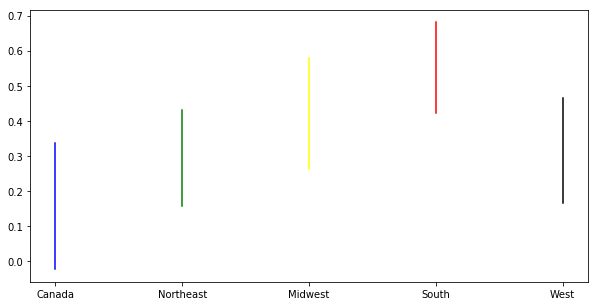

blue corresponds to Canada
green corresponds to Northeast
yellow corresponds to Midwest
red corresponds to South
black corresponds to West


In [157]:
dfCAN=dfLeave.loc[dfLeave["census_region"]=="Canada"]#build dataframes
dfNE=dfLeave.loc[dfLeave["census_region"]=="Northeast"]
dfMW=dfLeave.loc[dfLeave["census_region"]=="Midwest"]
dfS=dfLeave.loc[dfLeave["census_region"]=="South"]
dfW=dfLeave.loc[dfLeave["census_region"]=="West"]

dfarr=[dfCAN,dfNE,dfMW,dfS,dfW] #set up for iteration
refarr=["Canada","Northeast","Midwest","South","West"]#reference for names
CIarr=[]#stores confidence intervals
z = stats.norm.ppf(.975)
index=0

for a in dfarr:
    a["count"]=[0]*len(a)
    a=a.dropna(subset=["paid_leave_weeks_man","paid_leave_weeks_woman"])#drop empty tables
    a.loc[(a["paid_leave_weeks_man"]==0) & (a["paid_leave_weeks_woman"]==0),"count"]=1 #count zero paid parental leave universities
    prop=a["count"].mean()#get proportion
    if len(a)>=30:
        SE=a["count"].std()/np.sqrt(len(a["count"]))#get standard error
        CI=[prop-z*SE, prop+z*SE]#confidence interval
    else:#sample size too small for z statistic
        t = stats.t.ppf(0.975, len(a['count']) - 1) #get t statistic value, with degrees of freedom n-1 and significance level 0.05
        stdev=np.sqrt(((a["count"]-prop)**2).sum()/(len(a)-1)) #compute sample standard deviation
        err=stdev/np.sqrt(len(a)) #compute standard deviation estimate
        CI = [prop - err*t, prop + err*t] #confidence interval
    
    print(CI)
    CIarr.append(CI)#store confidence interval and name
    index+=1

fig, ax =plt.subplots(nrows=1,ncols=1,figsize=[10,5])
i=0
colors=["blue","green","yellow","red","black"]
for x in CIarr:
    print(x[0],x[1])
    plt.plot((i,i),(x[0],x[1]),color=colors[i])
    i+=1
x = np.array([0,1,2,3,4])
plt.xticks(x, refarr);
plt.show()
x=0
while(x<len(colors)):
    print(colors[x],"corresponds to",refarr[x])
    x+=1



The above graph illustrates a single statistically significant difference in policy from region to region, the difference in policy between Canada and the South. All other regions tend to exist within each other's confidence intervals.

### [30 points] Problem 3: Multiple Linear Otter-gression 
***

After years of study and professional development, you have finally landed your dream job as lead otter scientist.  It is a [dream job](https://www.youtube.com/watch?v=IXFqLIBHm-E). As your first project, you wish to use multiple linear regression to understand and predict what makes otters Instagrammable, as measured during many observations of otters, conducted by students.  Luckily, your predecessor has collected lots of data that might prove relevant.  You'll find this data in the file `otters.csv`. 

**Response**: 

- $\texttt{instagrammability}$: The instagrammability of a particular otter, measured by a complicated formula involving likes, comments, DMs, reposts, and new followers.

**Features**: 

- $\texttt{urchin color}$: the depth of color of the urchins nearby, measured in Wongs. 
- $\texttt{fur fluff}$: the fluff factor of the otter's fur, measured in Ketelsens.
- $\texttt{adorbz}$: unknown variable. The students keep writing it down. Units unknown.
- $\texttt{temp}$: the outside temperature, measured in degrees Fahrenheit 
- $\texttt{majesty}$: the majesty of this particular otter in this particular photo, measured as a fraction of maximum majesty (between 0 and 1). 
- $\texttt{observer GPA}$: the GPA of the student who recorded the data.
- $\texttt{paw size}$: measured as some kind of deviation away from the median paw size. Units unknown.
- $\texttt{paw grip}$: grip strength of paw (estimated) measured in Grochows. 
- $\texttt{ice cream sold}$: the number of units of ice cream sold at Etai's
- $\texttt{shark attacks}$: the number of shark attacks at the Boulder Res on the day of observation


In [109]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

**Part A**: Read the data from **otters.csv** into a Pandas DataFrame and clean the data.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data.  

In [138]:
df = pd.read_csv("data/otters.csv")
df=df.dropna(subset=["instagrammability","urchin color", "fur fluff", "adorbz", "temp", "majesty","observer GPA","paw size","paw grip", "ice cream sold", "shark attacks"])
df
                 

,instagrammability,urchin color,fur fluff,adorbz,temp,majesty,observer GPA,paw size,paw grip,ice cream sold,shark attacks
0,138.70,89.1ƭ,6.8ɭ,263.0,62℉,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4ƭ,8.0ɭ,264.0,63℉,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9ƭ,7.6ɭ,243.0,55℉,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1ƭ,6.0ɭ,260.0,52℉,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6ƭ,8.1ɭ,251.0,57℉,0.89,2.40,-6.0,43.0,186.0,0.0
5,98.24,86.6ƭ,7.7ɭ,259.0,71℉,1.00,3.60,-6.0,36.0,102.0,2.0
6,137.26,89.0ƭ,7.1ɭ,246.0,55℉,0.89,2.71,1.0,18.0,179.0,0.0
7,83.38,85.9ƭ,6.3ɭ,261.0,33℉,0.11,3.86,-16.0,150.0,183.0,0.0
8,102.26,94.8ƭ,7.0ɭ,243.0,70℉,1.00,2.34,-5.0,38.0,200.0,1.0
9,84.03,98.3ƭ,7.4ɭ,244.0,89℉,1.00,3.77,-8.0,54.0,184.0,1.0


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

In [139]:
df = pd.read_csv("data/otters.csv")
df=df.dropna(subset=["instagrammability","urchin color", "fur fluff", "adorbz", "temp", "majesty","observer GPA","paw size","paw grip", "ice cream sold", "shark attacks"])


def f(row):
    y=0
    new=""
    string=row[x]
    c=1
    if (isinstance(string, str)):
        while (y<len(string)):
            if string[y].isdigit():
                new=new+string[y]
            elif string[y]=='.':
                new=new+string[y]
            elif string[y]=='-':
                c=-1
            y+=1
        #print (new)
        new=float(new)*c
        return (new)
    else:
        return row[x]

ret=[]
for x in df.columns:
    if x!="instagrammability":
        df[x]=df.apply(f,axis=1)
        beta, alpha, rvalue, pvalue, stderr = stats.linregress(df[x], df["instagrammability"])
        t = stats.t.ppf(0.975, len(df[x]) - 2)
        CI = [beta - t * stderr, beta + t * stderr]
        if CI[0]*CI[1]>0:
            ret.append(x)
            print(x,"CI: [{:.3f}, {:.3f}]".format(CI[0], CI[1]))
print("The above lists several features correlated to response with a 95% confidence interval")


fur fluff CI: [5.610, 24.314]
temp CI: [-1.341, -0.356]
majesty CI: [-73.365, -17.957]
paw size CI: [4.319, 5.513]
shark attacks CI: [-17.961, -3.702]
The above lists several features correlated to response with a 95% confidence interval


**Part C**: Write a function `forward_select(df, resp_str, maxk)` that takes in the DataFrame, the name of the column corresponding to the response, and the max number of desired features, and returns a list of feature names corresponding to the maxk most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=5$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement `foward_select` yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection. 

In [135]:
import statsmodels.api as sm 

def forward_select(df, resp, maxk):
    z=0
    flag=0
    ft=[]
    min=["",99999999999999999]
    y = df[resp]
    X=df[["urchin color", "fur fluff", "adorbz", "temp", "majesty","observer GPA","paw size","paw grip", "ice cream sold", "shark attacks"]]
    X=sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    intercept=0#intercept was initially equal to par[0]=-35 but the SSE is far lower if the intercept=0 
    #print(intercept)
    while (z<maxk):
        for x in df.columns:
            if x!=resp and x not in ft:
                ft.append(x)
                X=df[ft]
                y = df[resp]
                model = sm.OLS(y, X).fit()
                par=model.params
                #print(par)
                q=0
                yhat=intercept
                for a in ft:
                    #print(par[q])
                    yhat+=par[q]*df[a]
                    q+=1
                SSE=((y-yhat)**2).sum()
                if SSE<min[1]:
                    min=[x,SSE]
                ft.remove(x)
        if min[0] not in ft:
            ft.append(min[0])
            print(ft)
        z+=1
    X=df[ft]
    y = df["instagrammability"]
    model = sm.OLS(y, X).fit()
    par=model.params
    #print(par)
    q=0
    yhat=intercept
    for a in ft:
        yhat+=par[q]*df[a]
        q+=1
    SSE=((y-yhat)**2).sum()
    #print(SSE)
    return [intercept,par,ft]
forward_select(df,'instagrammability',5)

['fur fluff']
['fur fluff', 'paw size']
['fur fluff', 'paw size', 'adorbz']
['fur fluff', 'paw size', 'adorbz', 'temp']
['fur fluff', 'paw size', 'adorbz', 'temp', 'urchin color']


[0, fur fluff       3.657579
 paw size        5.064576
 adorbz          0.402599
 temp           -0.988945
 urchin color    0.784172
 dtype: float64, ['fur fluff', 'paw size', 'adorbz', 'temp', 'urchin color']]

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

y=0 + 3.657579(fur_fluff) + 5.064576(paw_size) + 0.402599(adorbz) - 0.988945(temp) + 0.784172(urchin_color)

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

In [131]:
fullX=df[["urchin color", "fur fluff", "adorbz", "temp", "majesty","observer GPA","paw size","paw grip", "ice cream sold", "shark attacks"]]
fullX=sm.add_constant(fullX)
y = df["instagrammability"]
fmod = sm.OLS(y, fullX).fit()
par=fmod.params
q=0
yhatf=0
for a in df.columns:
    print(a)
    if q==0:
        yhatf+=par[q]
        q+=1
    else:
        yhatf+=par[q]*df[a]
        q+=1
SSEf=((y-yhatf)**2).sum()

intercept, par,ft =forward_select(df,'instagrammability',5)
q=0
yhat=intercept
for a in ft:
    yhat+=par[q]*df[a]
    q+=1
SSE=((y-yhat)**2).sum()
print(SSE,SSEf)
num=(SSE-SSEf)/(len(df.columns)-len(ft))
den=SSEf/(len(df)-len(df.columns)-1)
F=num/den
Fa=stats.f.ppf(0.05,len(df.columns)-len(ft),len(df)-len(df.columns)-1)#lec 25 sld:13-14
print(len(df)-len(df.columns)-1)
print(len(df.columns)-len(ft))
print(F,Fa)

instagrammability
urchin color
fur fluff
adorbz
temp
majesty
observer GPA
paw size
paw grip
ice cream sold
shark attacks
['fur fluff']
['fur fluff', 'paw size']
['fur fluff', 'paw size', 'adorbz']
['fur fluff', 'paw size', 'adorbz', 'temp']
['fur fluff', 'paw size', 'adorbz', 'temp', 'urchin color']
2008.9247678892048 1758.546786548261
73
6
1.7322629474234623 0.2682864335124061


2. Our calculated F statistic value for the the full versus reduced model is equal to 1.7322 while our calculated critical F value is equal to 0.268
.\n
HYPOTHESIS TESTING:
H_0: features not included in our reduced model are stastitically insignificant.
H_1: features not included in our reduced model are stastitically significant.
because our F statistic value is larger than our F critical value we can safely reject the null hypothesis, therefore the full model is better.

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict an otter's instagrammability when the following features are observed: 

- $\texttt{urchin color}$: 93 Wongs
- $\texttt{fur fluff}$: 8.2 Ketelsens
- $\texttt{adorbz}$: 273
- $\texttt{temp}$: 46F 
- $\texttt{majesty}$: 0.79 
- $\texttt{observer GPA}$: 3.50 
- $\texttt{paw size}$: -10 
- $\texttt{paw grip}$: 55 Grochows
- $\texttt{ice cream sold}$: 130
- $\texttt{shark attacks}$: 3 

In [130]:
fullX=df[["urchin color", "fur fluff", "adorbz", "temp", "majesty","observer GPA","paw size","paw grip", "ice cream sold", "shark attacks"]]
fullX=sm.add_constant(fullX)
y = df["instagrammability"]
fmod = sm.OLS(y, fullX).fit()
par=fmod.params
q=0
yhatf=0
for a in df.columns:
    print(a)
    if q==0:
        yhatf+=par[q]
        q+=1
    else:
        yhatf+=par[q]*df[a]
        q+=1
y=par[0]+par[1]*(93)+par[2]*8.2+par[3]*273+par[4]*46+par[5]*0.79+par[6]*3.5+par[7]*(-10)+par[8]*55+par[9]*130+par[10]*3
print('instagrammability',y)

instagrammability
urchin color
fur fluff
adorbz
temp
majesty
observer GPA
paw size
paw grip
ice cream sold
shark attacks
instagrammability 119.13757433829377
